____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno jueves noche__<br/>
__Analisis exploratorio de datos de SUBTE__<br/>
__Elaborado por: Martin Palazzo__
____

En este script continuaremos el análisis exploratorio de datos que comenzamos la clase pasada con el dataset de subtes

# clase_01: Importar data, describirla y visualizarla.

En esta segunda clase aprenderemos a realizar correlaciones lineales de Pearson, visualizar boxplots, comprender los quantiles de un set de datos y eliminar outliers observando que quantil (percentil) nos ayuda a filtrar. Primero haremos un repaso sobre el analisis exploratorio de subtes que realizamos la semana pasada. 

**Importamos las Librerías necesarias:** Utilizaremos Numpy para realizar calculos matriciales, pandas para manejar los datos y almacenarlos, y matplotlib junto con Seaborn para visualizar.

In [22]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

**Read_CSV:** Descargamos de https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes el dataset de usuarios de subte por molinete del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "molinetes". 

In [2]:
pwd

'c:\\Santiago Chas\\clusterai\\Clusterai_2024\\clase_01'

In [3]:
# importante detallar que el delimiter indica como estan separadas las columnas en el dataframe.
molinetes = pd.read_csv('./molinetes_2017.csv', delimiter=',',encoding='latin-1')


con el comando .head() observamos las primeras 5 filas de nuestro dataframe

In [4]:
# con el comando .head() podemos ver en pantalla las primeras filas y del dataframe
molinetes.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
0,1,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
1,2,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_N_TURN02,6,9 DE JULIO,1,0,0,1
2,3,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,1,0,0,1
3,4,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
4,5,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,2,0,0,2


Recordemos que el comando de numpy np.shape() nos indica las dimensiones de nuestro elemento, en este caso un dataframe de pandas.

In [5]:
# si queremos saber cuantos renglones y columnas tiene el objeto en cuestion, utilizamos el comando de numpy "shape".
# asi podemos ver que nuestro dataset posee mas de 11 millones de renglones y 12 columnas
np.shape(molinetes)

(11938476, 12)

Imprimimos en pantalla un breve reporte de un renglón sobre las dimensiones de nuestro dataframe.

In [6]:
# Ver que utilizamos la función de numpy "shape".
print("El dataset importado tiene "+ str(np.shape(molinetes)[0]) + " renglones y " + str(np.shape(molinetes)[1]) + " columnas")


El dataset importado tiene 11938476 renglones y 12 columnas


Si bien en nuestro dataset de subtes no existen columnas que tengan valores nulos o faltantes (NaNs) es necesario entender para otros datasets si hay valores faltantes para eliminarlos (o reemplazarlos por otro valor como la mediana).

In [7]:
# revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = molinetes.isnull().any()
col_nulls

V1                 False
FECHA              False
DESDE              False
HASTA              False
LINEA              False
MOLINETE           False
ID_ESTACION        False
ESTACION           False
PAX_PAGOS          False
PAX_PASES_PAGOS    False
PAX_FREQ           False
TOTAL              False
dtype: bool

# Columnas e Indices en Pandas

**Columnas e Indices en Pandas:** los dataframes de pandas se caracterizan por tener nombres explícitos por columna y por renglón (indice). Es decir que podemos llamar a un elemento (o varios) de un DataFrame por el nombre de su columna e índice.

In [8]:
# Obtenemos los nombres de las columnas del dataframe Molinetes
columnas_molinetes = molinetes.columns
columnas_molinetes

Index(['V1', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ID_ESTACION',
       'ESTACION', 'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FREQ', 'TOTAL'],
      dtype='object')

In [9]:
# Obtenemos los nombres de los índices (renglones o instancias) del dataframe Molinetes.
# Observamos que cuando imprimimos en pantalla los índices, fueron definidos al importar el csv con el parametro 
# "index_col" seleccionando la columna "PERIODO".
instancias_molinetes = molinetes.index
instancias_molinetes

RangeIndex(start=0, stop=11938476, step=1)

# Filtrar un dataframe por el valor de una columna

**Filtrar un dataframe por el valor de una columna:** Inicialmente filtraremos nuestro dataframe "molinetes_b" por el valor "LINEA_B" de la columna "LINEA". Para eso usamos la funcion ".loc" de pandas, sobre el dataframe.

In [10]:
molinetes.LINEA.value_counts(normalize=True)

LINEA
B          0.239160
LINEA_A    0.219688
D          0.215628
LINEA_C    0.125108
LINEA_H    0.103901
E          0.096515
Name: proportion, dtype: float64

In [11]:
# como inicialmente queremos trabajar con los datos de la Linea B, filtramos por el valor "LINEA_B" de la columna
# "LINEA" nuestro dataframe original llamado molinetes.
molinetes_b = molinetes.loc[molinetes['LINEA'] == 'B']

In [12]:
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando a los molinetes de la linea B
np.shape(molinetes_b)

(2855204, 12)

In [13]:
molinetes_b.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
488449,488450,01/01/2017,08:00:00,08:15:00,B,LINEA_B_GALLARDO_N_TURN01,28,ANGEL GALLARDO,0,0,1,1
488450,488451,01/01/2017,08:00:00,08:15:00,B,LINEA_B_GALLARDO_S_TURN01,28,ANGEL GALLARDO,1,0,0,1
488451,488452,01/01/2017,08:00:00,08:15:00,B,LINEA_B_GALLARDO_N_TURN04,28,ANGEL GALLARDO,0,0,1,1
488452,488453,01/01/2017,08:00:00,08:15:00,B,LINEA_B_GALLARDO_N_TURN02,28,ANGEL GALLARDO,2,0,1,3
488453,488454,01/01/2017,08:00:00,08:15:00,B,LINEA_B_GALLARDO_S_TURN02,28,ANGEL GALLARDO,1,0,0,1


In [14]:
print("Los registros de la linea B representan el " + str(np.round(np.shape(molinetes_b)[0]/np.shape(molinetes)[0],2)) + " de los registros totales")

Los registros de la linea B representan el 0.24 de los registros totales


# Visualizacion: Countplot

Visualización Countplot de Seaborn para las distintas lineas de subte.

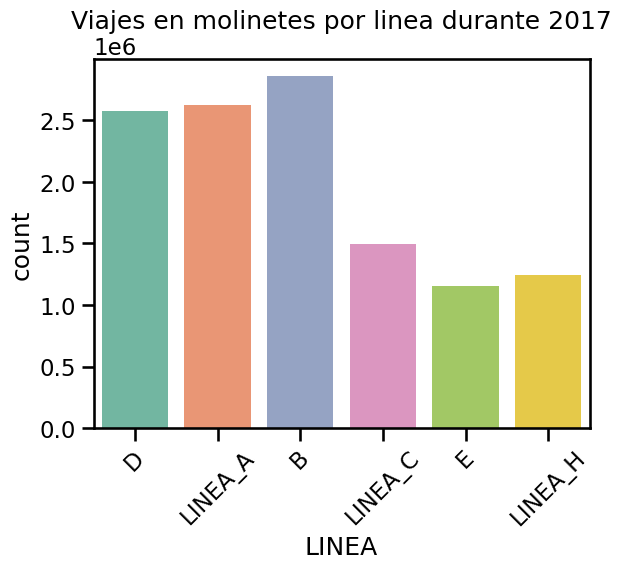

In [23]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "LINEA"
sns.set_context("talk")
az = sns.countplot(x="LINEA", data=molinetes, palette="Set2")
plt.xticks(rotation=45)
plt.title("Viajes en molinetes por linea durante 2017")
plt.show()

Visualización de Countplot de Seaborn para las distintas estaciones de la linea B.

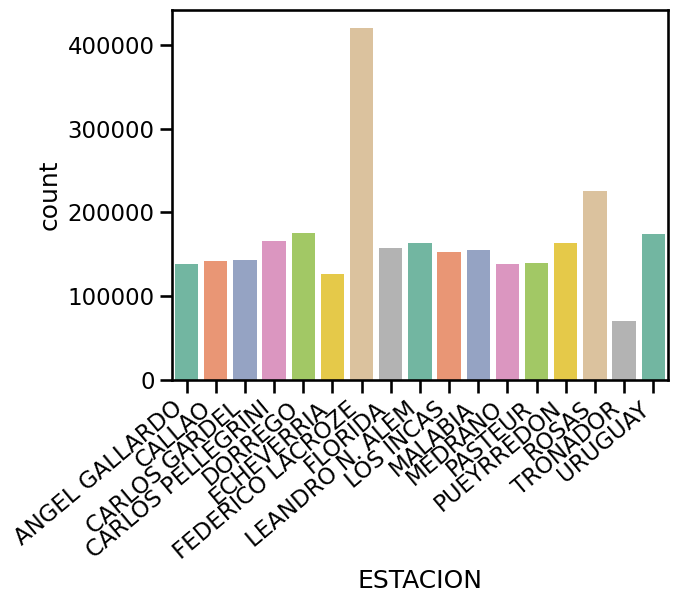

In [24]:
# luego generamos un countplot de seaborn por la columna estación, esta vez utilizando el nuevo dataframe filtrado
# molinetes_b, que solo contiene los datos de la linea B.
ax = sns.countplot(x="ESTACION", data=molinetes_b, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

# Visualizacion: Boxplot con Seaborn para linea B
Procedemos a realizar un boxplot por cada estacion, cuantificando asi donde se concentran cada lapso de tiempo en viajes de molinete. Ver que siempre la cantidad de periodos de 15 mins entre el 1er y 3er cuartil esta por debajo de 100 viajes. Es importante comprender la diferencia entre el boxplot visualizado a continuacion y el countplot visualizado en el paso anterior. ¿Que cambia entre uno y otro?

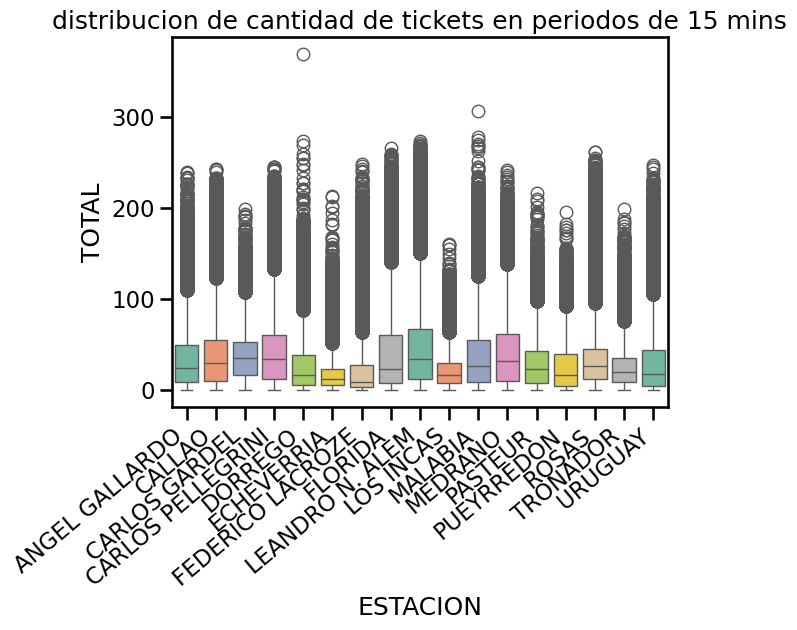

In [25]:
ay = sns.boxplot(x = molinetes_b.ESTACION, y = molinetes_b.TOTAL, data = molinetes_b, palette="Set2")
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("distribucion de cantidad de tickets en periodos de 15 mins")
plt.show()

# Análisis de la estación Lacroze de la linea B
Creamos un dataframe llamado "molinetes_lacroze" que contiene unicamente las instancias del dataframe "molinetes_b" cuyo valor del atributo/feature "ESTACION" sea igual a "FEDERICO LACROZE"

In [26]:
# filtramos con ".loc" el dataframe "molinetes_b" por el valor "Federico Lacroze" de la columna "Estacion"
molinetes_lacroze = molinetes_b.loc[molinetes_b.ESTACION== 'FEDERICO LACROZE']

In [27]:
#(molinetes_b.ESTACION == 'FEDERICO LACROZE').sum()

In [28]:
molinetes_lacroze.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
4416682,4416683,01/01/2017,08:00:00,08:15:00,B,LINEA_B_LACROZE_O_TURN09,66,FEDERICO LACROZE,2,0,0,2
4416683,4416684,01/01/2017,08:00:00,08:15:00,B,LINEA_B_LACROZE_E_TURN05,66,FEDERICO LACROZE,4,0,0,4
4416684,4416685,01/01/2017,08:00:00,08:15:00,B,LINEA_B_LACROZE_E_TURN06,66,FEDERICO LACROZE,0,0,1,1
4416685,4416686,01/01/2017,08:00:00,08:15:00,B,LINEA_B_LACROZE_O_TURN03,66,FEDERICO LACROZE,1,0,0,1
4416686,4416687,01/01/2017,08:00:00,08:15:00,B,LINEA_B_LACROZE_O_TURN07,66,FEDERICO LACROZE,2,0,0,2


**estadisticas descriptivas para la columna "TOTAL" del dataframe "molinetes_lacroze"**

In [29]:
molinetes_lacroze['TOTAL'].describe()

count    421233.000000
mean         19.292629
std          25.177922
min           0.000000
25%           3.000000
50%           9.000000
75%          27.000000
max         248.000000
Name: TOTAL, dtype: float64

**distplot para la columna "TOTAL" del dataframe "molinetes_lacroze"**

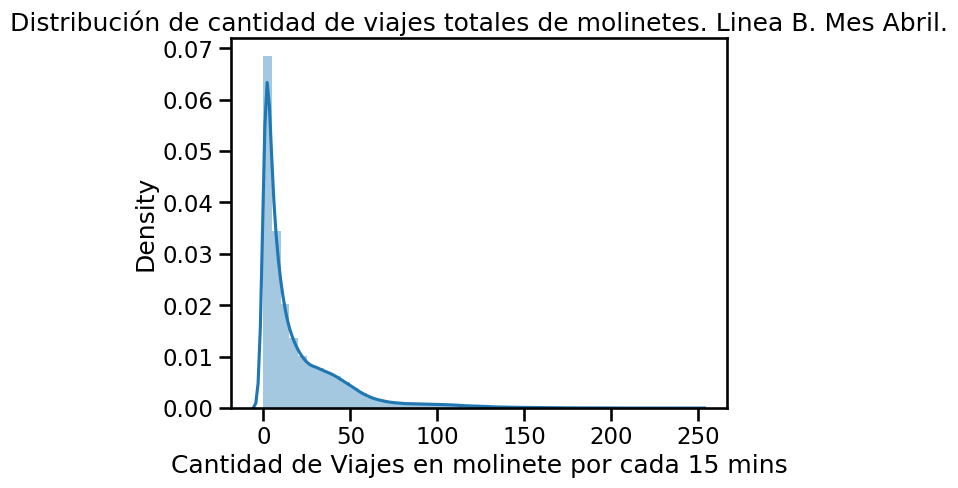

In [30]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
sns.distplot(molinetes_lacroze['TOTAL'])
plt.title('Distribución de cantidad de viajes totales de molinetes. Linea B. Mes Abril.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

**Boxplot para la columna TOTAL del dataframe "molinetes_lacroze"**
Realizaremos un boxplot con Matplotlib y otro con seaborn, simplemente para aprender que existen 2 maneras de visualizar.

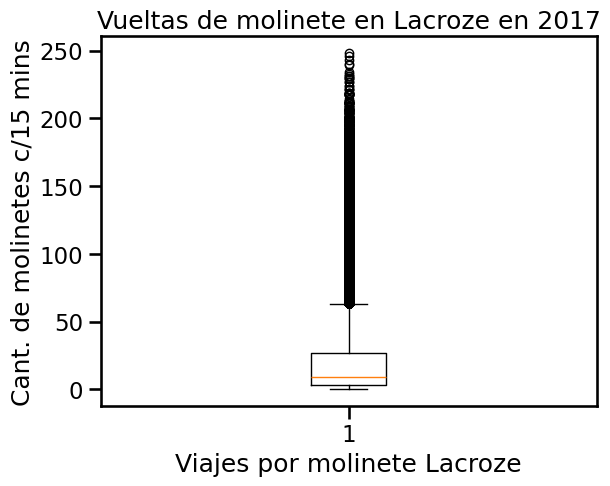

In [31]:
# boxplot realizado con Matplotlib
plt.boxplot(molinetes_lacroze['TOTAL'])
plt.title('Vueltas de molinete en Lacroze en 2017')
plt.ylabel('Cant. de molinetes c/15 mins')
plt.xlabel("Viajes por molinete Lacroze")
plt.show()

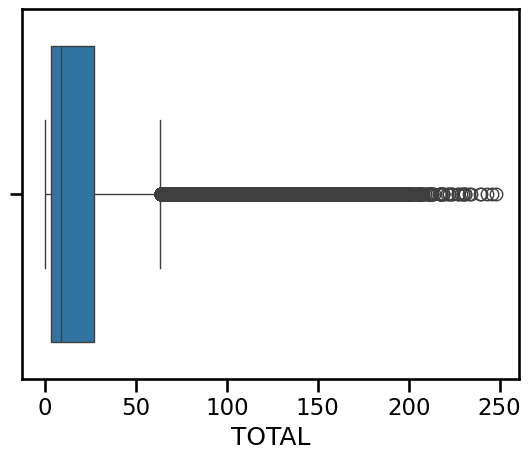

In [32]:
# probamos hacer el mismo boxplot con seaborn
sns.boxplot(x = "TOTAL", data =  molinetes_lacroze)
plt.show()

# Filtrado de outliers con cuantiles
Calculamos el valor del percentil 90. Lo que este sobre el percentil 90 lo llamaremos "hora pico" y lo que este por debajo sera "hora no pico".

Con el comando de pandas .quantile() calculamos los percentiles que deseemos. En algunos casos nos puede llegar a interesar tambien observar lo que se encuentre por debajo del percentil 10, aunque como observamos en el distplot, la distribucion es asimetrica a la derecha.

In [33]:
# calculo el percentil 90 de la columna "TOTAL" para el dataframe "molinetes_lacroze".
percentil_90 = molinetes_lacroze['TOTAL'].quantile(0.9)

In [34]:
# imprimimos en pantalla cuanto vale el percentil 0.9
percentil_90

50.0

Ahora filtramos por los valores de "TOTAL" que sean mayores al percentil 90 para guardarlos en otro dataframe llamado "Lacroze_hora_pico". Lo mismo hacemos para los que son menores al percentil 90 y los guardamos como "hora no pico".

In [35]:
lacroze_hora_pico = molinetes_lacroze.loc[molinetes_lacroze['TOTAL']>percentil_90]

In [36]:
lacroze_hora_nopico = molinetes_lacroze.loc[molinetes_lacroze['TOTAL']<percentil_90]

Observamos que la expresion **"molinetes_lacroze['TOTAL']<percentil_90"** es un vector Boolean, es decir que arroja True o False, y al filtrar utilizando un vector boolean solo sobreviven las filas que esten asociadas a un True.

In [37]:
# observamos que cuando indicamos una expresion logica, lo que devuelve python son valores Booleanos como True or False.
(molinetes_lacroze['TOTAL']<percentil_90).head()

4416682    True
4416683    True
4416684    True
4416685    True
4416686    True
Name: TOTAL, dtype: bool

In [38]:
# observamos que dimensiones tienen ahora los dataframes de hora pico y hora no pico
np.shape(lacroze_hora_nopico)

(378809, 12)

In [39]:
np.shape(lacroze_hora_pico)

(40621, 12)

Ploteamos la distribucion / histograma de la hora pico, ver que los valores del eje X comienzan a partir de 50, que fue el umbral que seleccionamos para dividir ambas categorias.

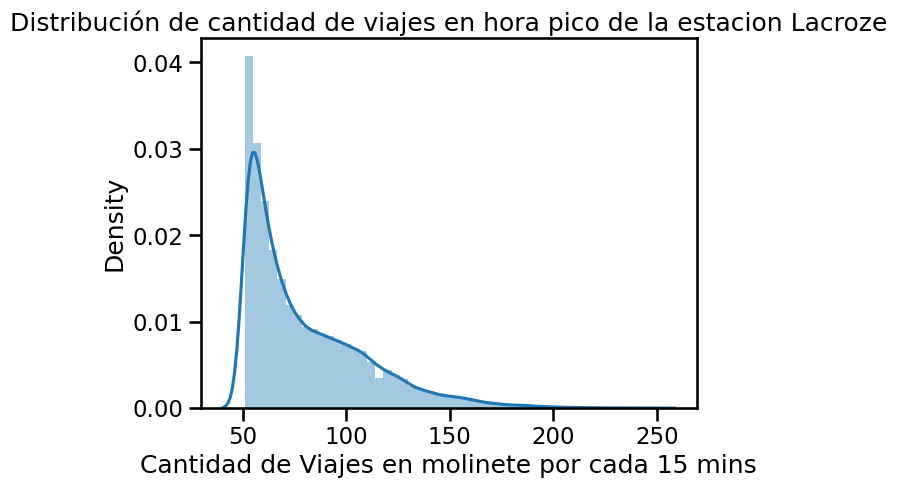

In [40]:
# hacemos un distplot de la columna TOTAL del dataframe "lacroze_hora_pico"
sns.distplot(lacroze_hora_pico['TOTAL'], norm_hist = False)
plt.title('Distribución de cantidad de viajes en hora pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

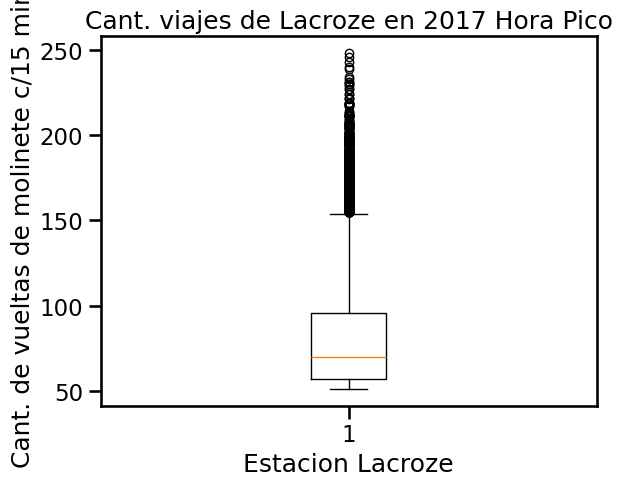

In [41]:
# con matplotlib hacemos un boxplot sobre la columna TOTAL del dataframe "lacroze_hora_pico"
plt.boxplot(lacroze_hora_pico['TOTAL'])
plt.title('Cant. viajes de Lacroze en 2017 Hora Pico')
plt.ylabel('Cant. de vueltas de molinete c/15 mins')
plt.xlabel("Estacion Lacroze")
plt.show()

Calculamos estadisticas descriptivas para la hora pico

In [42]:
# aplicamos .describe() sobre la columna TOTAL del dataframe "lacroze_hora_pico"
lacroze_hora_pico['TOTAL'].describe()

count    40621.000000
mean        80.194604
std         28.975506
min         51.000000
25%         57.000000
50%         70.000000
75%         96.000000
max        248.000000
Name: TOTAL, dtype: float64

Ahora calculamos estadisticas descriptivas y graficos para la hora no pico. **¿que diferencias hay en estas estadisticas entre hora pico y hora no pico?**

In [43]:
# aplicamos .describe() sobre la columna TOTAL del dataframe "lacroze_hora_nopico"
lacroze_hora_nopico['TOTAL'].describe()

count    378809.000000
mean         12.615743
std          12.964954
min           0.000000
25%           2.000000
50%           7.000000
75%          19.000000
max          49.000000
Name: TOTAL, dtype: float64

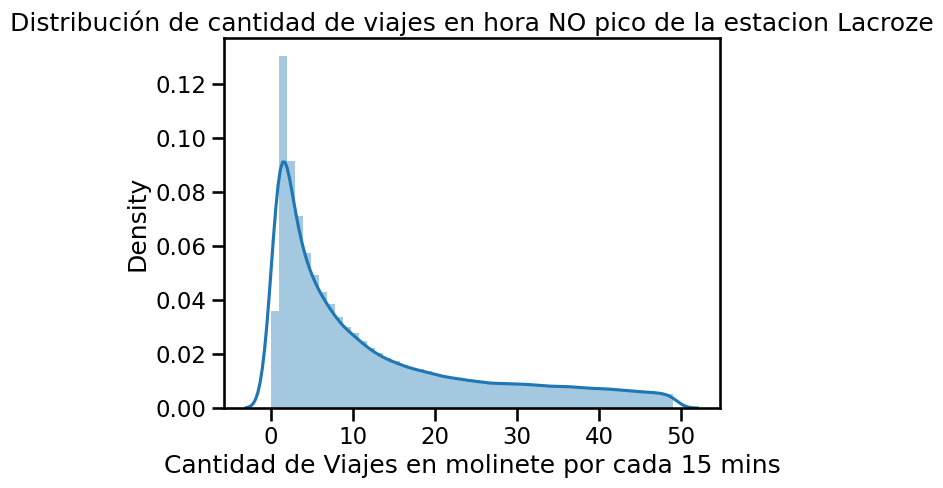

In [44]:
# hacemos un distplot sobre la columna TOTAL del dataframe "lacroze_hora_nopico"
sns.distplot((lacroze_hora_nopico['TOTAL']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

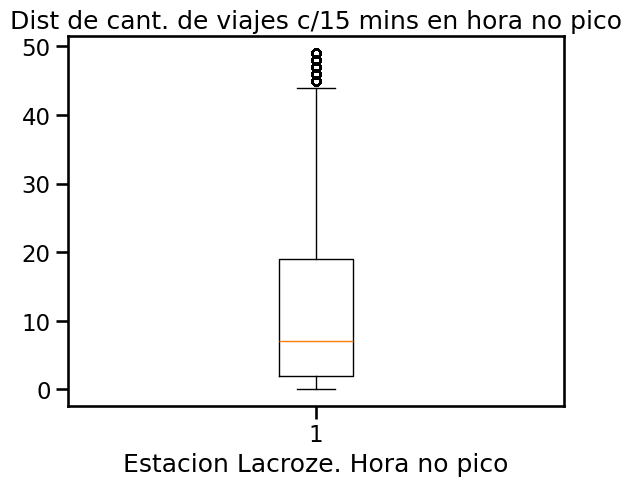

In [45]:
# hacemos un boxplot con matplotlib sobre la columna TOTAL del dataframe "lacroze_hora_nopico"
plt.boxplot(lacroze_hora_nopico['TOTAL'])
plt.title("Dist de cant. de viajes c/15 mins en hora no pico")
plt.xlabel("Estacion Lacroze. Hora no pico")
plt.show()

Ahora comparamos como queda la distribucion de cantidad de viajes cada 15 mins con los datos originales, en hora pico y en hora no pico.

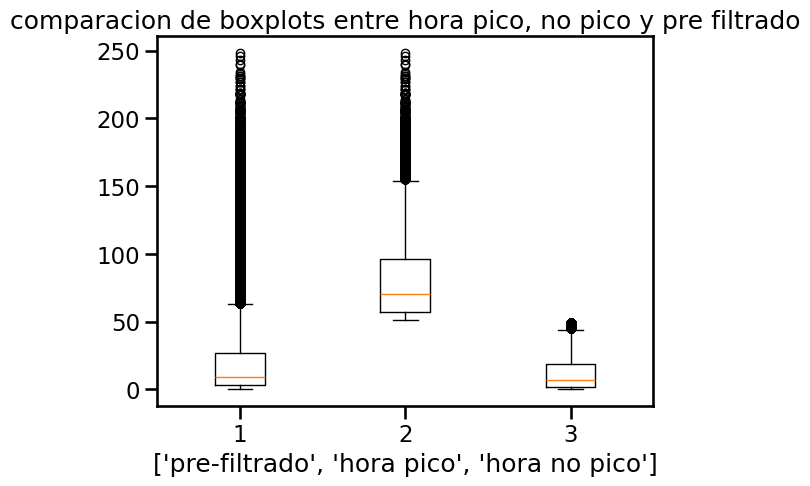

In [46]:
# con matplotlib hacemos un boxplot de los 3 grupos de datos. Ver que ingresamos 3 dataframes filtrados por la columna TOTAL
plt.boxplot([molinetes_lacroze['TOTAL'],lacroze_hora_pico['TOTAL'], lacroze_hora_nopico['TOTAL']])
plt.title('comparacion de boxplots entre hora pico, no pico y pre filtrado')
plt.xlabel(['pre-filtrado', 'hora pico', 'hora no pico'])
plt.show()

Tambien podriamos visualizar en simultáneo las distribuciones de los viajes en horas pico y no pico.

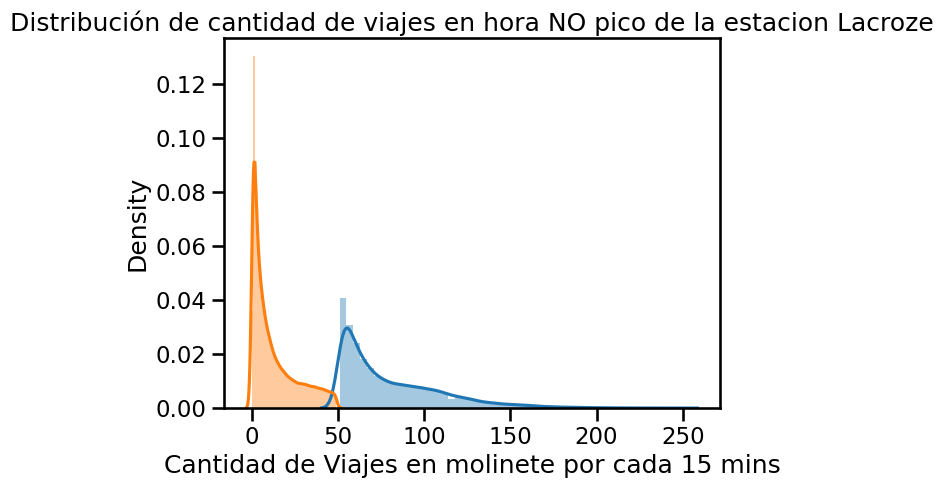

In [47]:
# hacemos dos displots en el mismo grafico. Uno para hora pico y otro para hora no pico.
sns.distplot((lacroze_hora_pico['TOTAL']))
sns.distplot((lacroze_hora_nopico['TOTAL']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

# Correlación Lineal entre estaciones Linea C

\begin{equation}
r = \frac{\sum_{i}^{n}\left ( x_i - \overline{x} \right )\left ( y_i - \overline{y}  \right )}{\left [ \sum_{i}^{n} \left ( x_i - \overline{x}  \right )^{2} \left ( y_i - \overline{y} \right ) ^{2}  \right ]^{1/2}}
\end{equation}

La correlacion lineal (Pearson) es un indicador que varia entre -1 y 1. Indica si dos variables supuestas independientes, se comportan linealmente una de la otra al analizalas juntas. Correlacion r>0 implica correlacion lineal positiva y r<0 implica correlacion lineal negativa. Si r=0 quiere decir que no existe correlacion LINEAL, aunque puede existir otro tipo de correlacion no lineal.

**IMPORTANTE: Correlacion no implica causalidad**. Si dos variables estan altamente correlacionadas, nada indica que una es la causa de la otra, es decir, nada indica que una depende de otra.

Creamos un dataframe solo de la linea C filtrando el dataframe "molinetes" por la columna "LINEA"

In [48]:
# f
molinetes_c = molinetes[(molinetes['LINEA'] == 'LINEA_C')]

In [49]:
molinetes_c.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
627230,627231,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_AVMAYO_S_TURN03,16,AVENIDA DE MAYO,4,0,0,4
627231,627232,01/01/2017,08:00:00,08:15:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,1,0,0,1
627232,627233,01/01/2017,08:15:00,08:30:00,LINEA_C,LINEA_C_AVMAYO_S_TURN02,16,AVENIDA DE MAYO,2,0,0,2
627233,627234,01/01/2017,08:15:00,08:30:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,1,0,0,1
627234,627235,01/01/2017,08:30:00,08:45:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,2,0,0,2


Ahora creamos una tabla pivote para resumir por columnas ESTACION y filas FECHA, los valores de cantidad de viajes de molinetes para la linea C

In [50]:
from datetime import datetime

In [51]:
# converting the string to datetime format
molinetes_c['FECHA'] = pd.to_datetime(molinetes_c['FECHA'], format='%d/%m/%Y')
molinetes_c['PERIODO'] = molinetes_c['FECHA'].dt.to_period('M')

In [52]:
molinetes_c.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL,PERIODO
627230,627231,2017-01-01,08:00:00,08:15:00,LINEA_C,LINEA_C_AVMAYO_S_TURN03,16,AVENIDA DE MAYO,4,0,0,4,2017-01
627231,627232,2017-01-01,08:00:00,08:15:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,1,0,0,1,2017-01
627232,627233,2017-01-01,08:15:00,08:30:00,LINEA_C,LINEA_C_AVMAYO_S_TURN02,16,AVENIDA DE MAYO,2,0,0,2,2017-01
627233,627234,2017-01-01,08:15:00,08:30:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,1,0,0,1,2017-01
627234,627235,2017-01-01,08:30:00,08:45:00,LINEA_C,LINEA_C_AVMAYO_S_TURN01,16,AVENIDA DE MAYO,2,0,0,2,2017-01


In [53]:
molinetes_c.PERIODO.value_counts()

PERIODO
2017-10    142155
2017-08    142116
2017-07    141151
2017-09    139094
2017-11    137282
2017-05    136947
2017-06    135834
2017-12    134288
2017-04    126951
2017-03    120977
2017-01     71167
2017-02     65636
Freq: M, Name: count, dtype: int64

In [54]:
# hacemos la tabla pivote para "simplificar o resumir" los datos provenientes de "molinetes_c" 
molinetes_c_pivot = pd.pivot_table(molinetes_c, values = 'TOTAL', columns = 'ESTACION', index = 'PERIODO',fill_value=0, aggfunc = np.sum)


In [55]:
# observamos como quedo la tabla pivote con un .head()
molinetes_c_pivot

ESTACION,AVENIDA DE MAYO,CONSTITUCION,DIAGONAL NORTE,GENERAL SAN MARTIN,INDEPENDENCIA,LAVALLE,MARIANO MORENO,RETIRO,SAN JUAN
PERIODO,,,,,,,,,
2017-01,106068,8229,88541,135184,195139,118027,110087,511180,705
2017-02,102016,1,92249,137498,228300,117724,124408,517505,0
2017-03,179735,1673294,180484,276231,188051,278616,219070,1016705,155478
2017-04,147947,1674946,152623,233642,161896,244432,184197,941852,157027
2017-05,173288,1973564,178884,280895,178144,290885,217205,1105674,179406
2017-06,169204,2014635,175192,273930,175918,288304,215516,1072387,178032
2017-07,168055,2092928,169996,269759,168864,293409,215680,1075027,166375
2017-08,183071,2194515,186547,269831,194932,300061,228695,1135572,184422
2017-09,173832,2192401,174427,266407,187309,288445,223181,1104449,181974


In [56]:
type(molinetes_c_pivot)

pandas.core.frame.DataFrame

ahora generamos una matriz de correlacion de Pearson entre cada estacion de la linea C. Con esto queremos entender si cuando aumenta o diminuye los viajes de molinetes de una estacion, el resto de las estaciones evoluciona directa o indirectamente proporcional de manera lineal.

In [57]:
# creamos una matriz "mol_c_corr" que es lo obtenido de aplicar .corr() a "molinetes_c_pivot"
mol_c_corr = molinetes_c_pivot.corr()

In [58]:
# observamos las dimensiones de esta matriz
np.shape(mol_c_corr)

(9, 9)

In [59]:
# visualizamos las primeras 3 filas de la matriz de correlacion
mol_c_corr

ESTACION,AVENIDA DE MAYO,CONSTITUCION,DIAGONAL NORTE,GENERAL SAN MARTIN,INDEPENDENCIA,LAVALLE,MARIANO MORENO,RETIRO,SAN JUAN
ESTACION,,,,,,,,,
AVENIDA DE MAYO,1.000000,0.944188,0.992863,0.981723,-0.457787,0.976326,0.988167,0.969090,0.957276
CONSTITUCION,0.944188,1.000000,0.954917,0.960572,-0.619212,0.982128,0.968479,0.993509,0.985945
DIAGONAL NORTE,0.992863,0.954917,1.000000,0.991764,-0.498654,0.987925,0.989611,0.975702,0.975865
GENERAL SAN MARTIN,0.981723,0.960572,0.991764,1.000000,-0.561860,0.991635,0.983916,0.978116,0.978627
INDEPENDENCIA,-0.457787,-0.619212,-0.498654,-0.561860,1.000000,-0.589436,-0.460423,-0.566942,-0.621854
LAVALLE,0.976326,0.982128,0.987925,0.991635,-0.589436,1.000000,0.984779,0.989564,0.987991
MARIANO MORENO,0.988167,0.968479,0.989611,0.983916,-0.460423,0.984779,1.000000,0.985829,0.969720
RETIRO,0.969090,0.993509,0.975702,0.978116,-0.566942,0.989564,0.985829,1.000000,0.986176
SAN JUAN,0.957276,0.985945,0.975865,0.978627,-0.621854,0.987991,0.969720,0.986176,1.000000


# Heatmap de correlacion estaciones linea C
Utilizamos la funcion Heatmap de seaborn para visualizar la matriz de correlacion que generamos en el paso anterior. Observamos que la estacion Independencia correlaciona negativamente con el resto. Esto quiere decir que cuando el resto de las estaciones incrementa su numero de pasajeros por molinete, en Independencia decrece demanera lineal.

<Axes: xlabel='ESTACION', ylabel='ESTACION'>

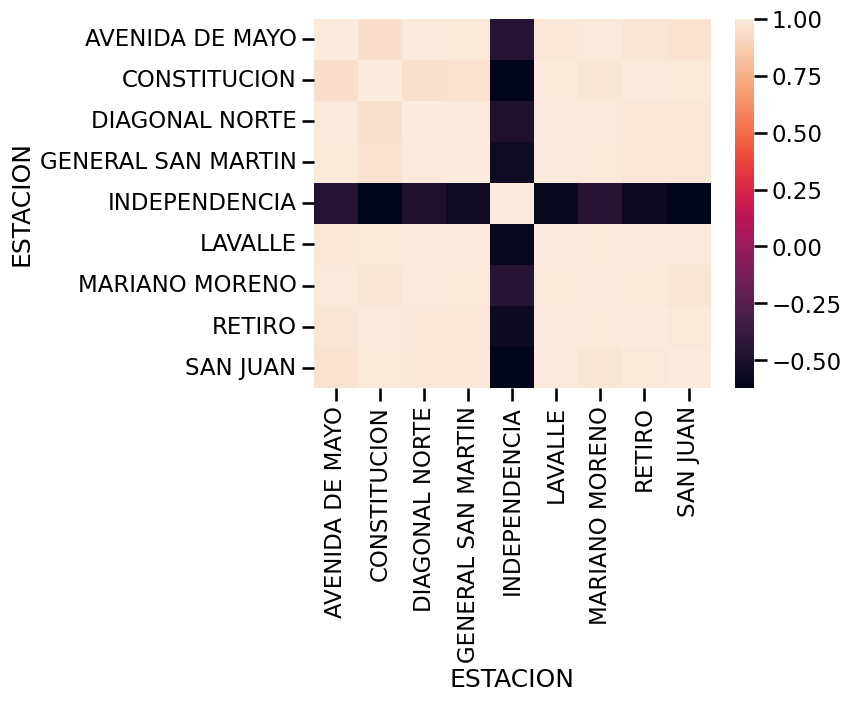

In [60]:
sns.heatmap(mol_c_corr)

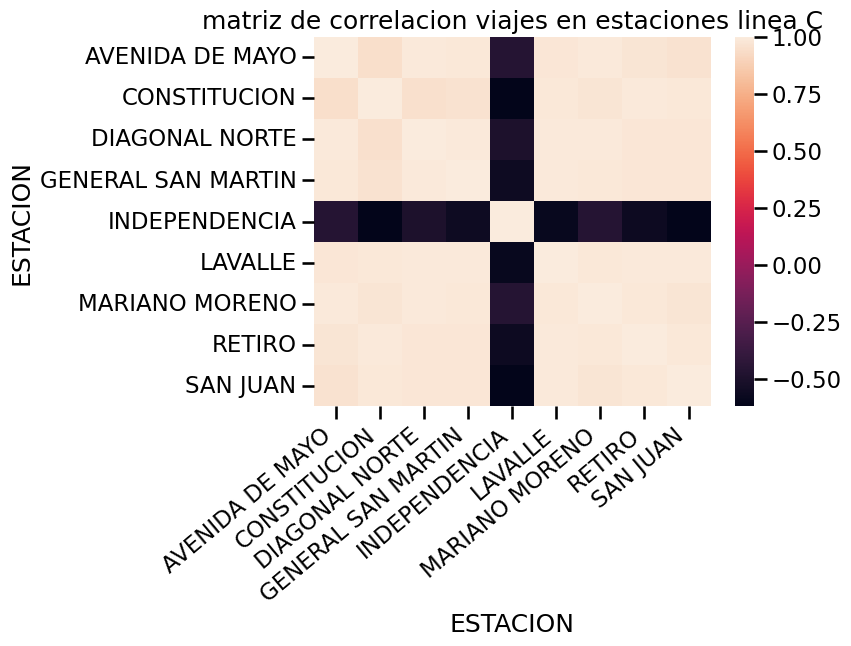

In [61]:
corr_c_plot = sns.heatmap(mol_c_corr, xticklabels=1, yticklabels=1)
corr_c_plot.set_xticklabels(corr_c_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("matriz de correlacion viajes en estaciones linea C")
plt.show()

Observamos que la estacion Independencia correlaciona negativamente con respecto al resto de las estaciones. Posiblemente sea un efecto de que Independencia es un nodo que intersecta a la linea E.